## DAB200 -- Fall 2021 -- Lab 3

In this lab, you will gain some experience in converting non-numeric features in a dataset to numeric so they can be used in a machine learning model.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-3 | veh14.csv |
| 4-6 | veh15.csv |
| 7-9 | veh16.csv |
| 10-12 | veh17.csv |
| 13-15 | veh18.csv |
| 16-17 | veh19.csv |

**Important Notes:**
- Use [Chapter 6](https://mlbook.explained.ai/catvars.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!
- After you write your code, make sure that you remove `raise NotImplementedError()`

### Part 0

Please provide the following information by editing this cell:
 - Group 12 
 - Nikhil Joshi
 - Gurpreet Kaur
 - Gurjeet Kaur


### Part 1 - Create and evaluate an initial model

In this part you should: 
 - read in the data
 - isolate all numeric features from original data set
 - verify there are no missing values
 - create and evaluate a baseline model 

#### Code (15 marks)

**Replace the value of `data_string` with the data for your group. Do not use the full path; only the name of the data.csv**. You won't need a full path if you put your csv file in the same folder where you put this notebook

In [40]:
data_string = 'veh17.csv'

**Code for reading data, isolating numeric features, and verifying that there are no missing values:**

In [41]:
# Code for reading the data and assigning it under variable vehfile
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

vehfile=pd.read_csv('veh17.csv')
vehfile.head(5).T

,0,1,2,3,4
Eng Displ,3.5,1.8,6,6,5.2
# Cyl,6,4,12,12,10
Comb Unadj FE - Conventional Fuel,29.3561,34.4702,18.1901,15.415,21.0869
# Gears,9,6,7,7,7
Max Ethanol % - Gasoline,10,10,10,10,15
Intake Valves Per Cyl,2,2,2,2,2
Exhaust Valves Per Cyl,2,2,2,2,2
Var Valve Lift?,N,N,N,N,Y
Fuel Metering Sys Desc,Spark Ignition Direct Injection,Spark Ignition Direct Injection,Multipoint/sequential fuel injection,Multipoint/sequential fuel injection,Spark Ignition direct & ported injection
Stop/Start System (Engine Management System) Description,Yes,No,No,No,No


In [42]:
# Code for checking/retrieving or isolating all numeric values/features
numeric_vehfile=vehfile.select_dtypes(include=np.number)
numeric_vehfile.columns.tolist()

['Eng Displ',
 '# Cyl',
 'Comb Unadj FE - Conventional Fuel',
 '# Gears',
 'Max Ethanol % - Gasoline',
 'Intake Valves Per Cyl',
 'Exhaust Valves Per Cyl']

In [43]:
# Checking/verifying for null values
print(numeric_vehfile.isnull().any())

Eng Displ                            False
# Cyl                                False
Comb Unadj FE - Conventional Fuel    False
# Gears                              False
Max Ethanol % - Gasoline             False
Intake Valves Per Cyl                False
Exhaust Valves Per Cyl               False
dtype: bool


#### Create and evaluate a baseline model:
Put all your code inside the function below. After your code is entered, running the function below must return the mean oob score. Do not provide any arguments to the function

In [44]:
def estimate_mean_oob_score_baseline():
    for n in range(10):
        X = numeric_vehfile.drop('Comb Unadj FE - Conventional Fuel', axis=1)
        y = numeric_vehfile['Comb Unadj FE - Conventional Fuel']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
        rf = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
        rf.fit(X,y)
        oob_baseline = np.mean(rf.oob_score_)
    return oob_baseline

Running the following cell should not throw any error if your code in the cell above is correct.  Do not edit the following cell.

In [45]:
baseline_oob_score = estimate_mean_oob_score_baseline()

print(baseline_oob_score)


if data_string == 'veh14.csv':
    output = 0.803
elif  data_string == 'veh15.csv':
    output = 0.784
elif  data_string == 'veh16.csv':
    output = 0.780
elif  data_string == 'veh17.csv':
    output = 0.737
elif  data_string == 'veh18.csv':
    output = 0.697
elif  data_string == 'veh19.csv':
    output = 0.694
    

if np.isclose(baseline_oob_score , output, rtol = 0.01) == True:
    part1_marks = 15
    
assert np.isclose(baseline_oob_score , output, rtol = 0.01)


0.7402466577039157


### Part 2 - Convert non-numeric features to numeric

In this part you should: 
 - convert **all** non-numeric features to numeric
 - one of the conversions should use **one-hot encoding**
 
 
You can create new cells to explore the feature values, but do not remove any existing cells
 
#### Code (25 marks)

In [46]:
#Viewing all non numeric features
string_vehfile = vehfile.select_dtypes(include=['object'])
string_vehfile.columns.tolist()

['Var Valve Lift?',
 'Fuel Metering Sys Desc',
 'Stop/Start System (Engine Management System)  Description',
 'Air Aspiration Method Desc',
 'Label Recalc?']

In [47]:
# Viewing the data to see if we need to normalize the values

print(vehfile['Var Valve Lift?'].unique(),'\n')
print(vehfile['Fuel Metering Sys Desc'].unique(),'\n')
print(vehfile['Air Aspiration Method Desc'].unique(),'\n')
print(vehfile['Label Recalc?'].unique(),'\n')
print(vehfile['Stop/Start System (Engine Management System)  Description'].unique())


['N' 'Y'] 

['Spark Ignition Direct Injection' 'Multipoint/sequential fuel injection'
 'Spark Ignition direct & ported injection'] 

['Turbocharged' 'Naturally Aspirated' 'Supercharged'
 'Turbocharged+Supercharged'] 

['N' 'Y'] 

['Yes' 'No']


Put all your code for encoding the dataset in the cell below. It should contain all the required code for encoding all categorical features. 

You would want to explore the features first, but DO NOT do that in the cell below. You can create more cells to do the exploration. But the following cell must contain all the required encoding code only.

In [48]:
def encoded_dataframe():
    vehfile_onehot = pd.get_dummies(vehfile,columns = ['Var Valve Lift?'])
    
    ordinal_encode = ce.OrdinalEncoder(mapping=[{'col': 'Air Aspiration Method Desc', 'mapping': {'Turbocharged':0, 'Naturally Aspirated':1,'Supercharged':2,'Turbocharged+Supercharged':3,}}, 
                                            
                                             {'col': 'Fuel Metering Sys Desc', 'mapping': {'Spark Ignition Direct Injection':0 ,'Multipoint/sequential fuel injection':1 ,'Spark Ignition direct & ported injection':2}},
                                           
                                             {'col':'Label Recalc?', 'mapping':{'N':0, 'Y':1}},
                                            
                                             {'col':'Stop/Start System (Engine Management System)  Description','mapping':{'No':0 ,'Yes':1}}])
    ordinal_encode.fit(vehfile_onehot)
    encoded_df = ordinal_encode.transform(vehfile_onehot)
    encoded_df.reset_index(drop=True)
    return encoded_df
    

Running the following cell should not throw any errors if your encoding code in the cell above is correct. Do not edit the following cell.

In [49]:
encoded_df = encoded_dataframe()


from pandas.api.types import is_numeric_dtype

cols_are_numeric = []
for col in encoded_df.columns:
    cols_are_numeric.append(is_numeric_dtype(encoded_df[col]))
    
    
if encoded_df.shape[1] == sum(cols_are_numeric):
    part2_marks = 25
    
assert encoded_df.shape[1] == sum(cols_are_numeric)


### Part 3 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using all the features from Parts 1 and 2 above 
 - estimate the mean oob score from 10 runs

#### Code (15 marks)

Put all your code in the function below. Do not provide any arguments to this function. This function must return:
- feature array
- target array
- mean oob score of 10 runs
- the fitted random forest model object

In [50]:

def estimate_mean_oob_score_final():
    
    X = encoded_df.drop('Comb Unadj FE - Conventional Fuel', axis=1)
    y = encoded_df['Comb Unadj FE - Conventional Fuel']
    
    for n in range(10):
       
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
        ranf2 = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
        
        fitted_rf=ranf2.fit(X_train, y_train)
        feature_array=X
        target_array=y      
        final_oob_score = np.mean(ranf2.oob_score_)

    return feature_array, target_array,final_oob_score,ranf2
        

 Do not edit the following cell.

In [51]:
feature_array, target_array, final_oob_score, fitted_rf = estimate_mean_oob_score_final()

if final_oob_score > baseline_oob_score:
    part3_marks = 15    
    
assert final_oob_score > baseline_oob_score

### Part 4 - Lab Viva: Feature importances and comparison (10 marks)

This part will be discussed during the Lab Viva

In this part you should:
 - calculate the percent difference between the results of Part 1 and Part 3 (make sure you are using the correct formula for percent difference) 
 - based on the percent difference, state whether or not the results of Part 3 are an improvement over the results of Part 1
 - use the `rfpimp` package to calculate and display the feature importances for all features


In [52]:
percentage_diff=((final_oob_score-baseline_oob_score)/baseline_oob_score)*100

print("Baseline OOB Score is:",baseline_oob_score,"\n")
print("Final OOB Score is:",final_oob_score,"\n")

print("The Percentage Difference in OOB Scores is:",percentage_diff,"\n")

Baseline OOB Score is: 0.7402466577039157 

Final OOB Score is: 0.8672946795703504 

The Percentage Difference in OOB Scores is: 17.16293083450185 



 - Based on the difference in OOB scores, the results have improved in Part 2 by 17.5% (approx.)

C:\Users\Nikhi\anaconda3\lib\site-packages\rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


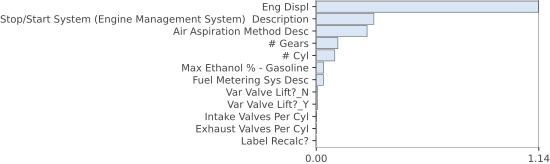

In [53]:
from rfpimp import *
X = encoded_df.drop('Comb Unadj FE - Conventional Fuel', axis=1)
y = encoded_df['Comb Unadj FE - Conventional Fuel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
ranf3 = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
fitted_rf=ranf3.fit(X_train, y_train)       
        
features=list(X.columns)
I=importances(ranf3,X,y,features=features)
plot_importances(I)

### Part 5: Lab Viva - Other questions (35)

These questions will be asked during the live session to individual members in your group.

- Explain the purpose of creating a baseline model. 
- Please provide an explanation for each conversion from non-numeric to numeric and state why this conversion is appropriate. 
- Based on the feature importances, are any features that you think should be removed from the data set.  Why do you think these features should be removed? 

**Do not edit the following cells:**

In [54]:
parts_1_to_3_marks = part1_marks + part2_marks + part3_marks
parts_1_to_3_marks

# part4_marks =

# part5_marks = 

total_marks = parts_1_to_3_marks #+ part4_marks + part5_marks
total_marks

55